# ECE251: Signals and Fundamentals Project
### Team members:
- **Shehab Mahmoud Salah**          *2100320*
- **Abdelrahman Hany Mohamed**      *2100627*
- **Youssef Ahmed Mohamed**         *2101006*
- **Omar Mamon Hamed**              *2100767*
- **Seif Eldeen Ahmed Abdulaziz**   *2100339*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.io import wavfile
import scipy.fft as fft

# Define file path and filter parameters
input_file='input.wav'
fs, data = wavfile.read(input_file) # sampling rate == f_s & data == x
data = np.mean(data, axis=1) # convert stereo to mono
cutoff = 400 # Hz (adjust for desired filter effect)
order = 3 # filter order -> to be used in butter()
filter_type='lowpass' # can be "lowpass" or "highpass"

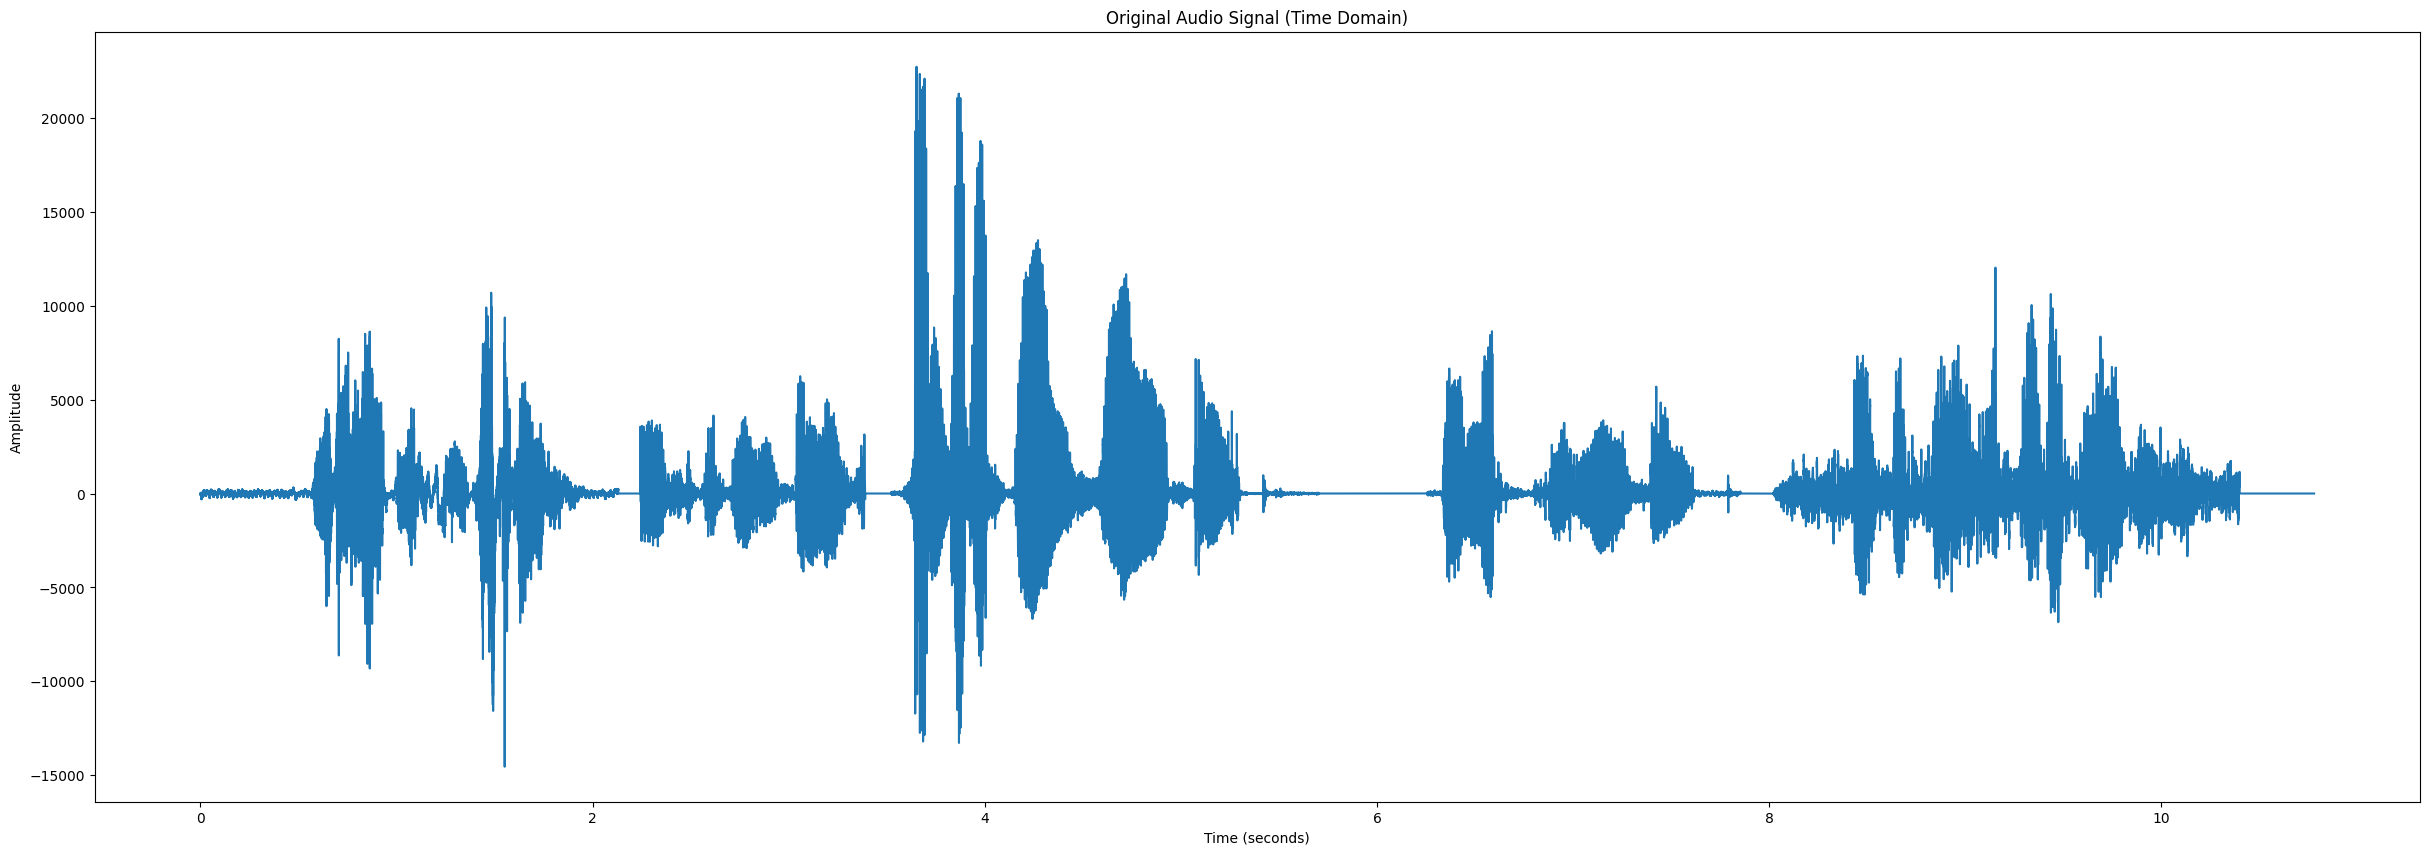

In [2]:
# Create a time array (in seconds)
t = np.linspace(0, len(data) / fs, num=len(data))

# Plot time domain signal
plt.figure(figsize=(30, 10))
plt.plot(t, data)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Original Audio Signal (Time Domain)")
plt.show()

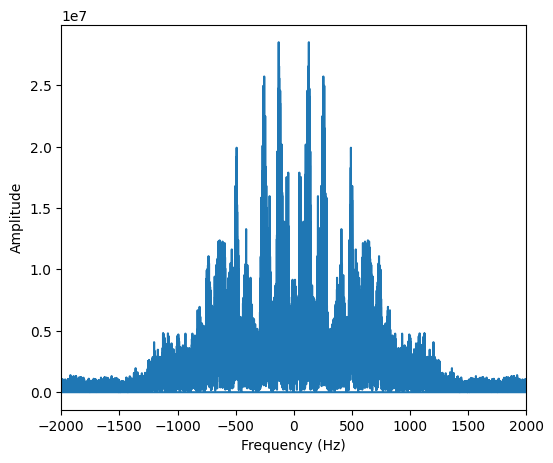

In [3]:
# Calculate the FFT value of frequency spectrum
transformed_signal = fft.fft(data) # get fft of data

# Compute the frequencies
frequencies = np.fft.fftfreq(len(transformed_signal), 1/fs)

# Plot the absolute value of the FFT
plt.figure(figsize=(6, 5))
plt.plot(frequencies, np.abs(transformed_signal))
plt.xlim(-2000,2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

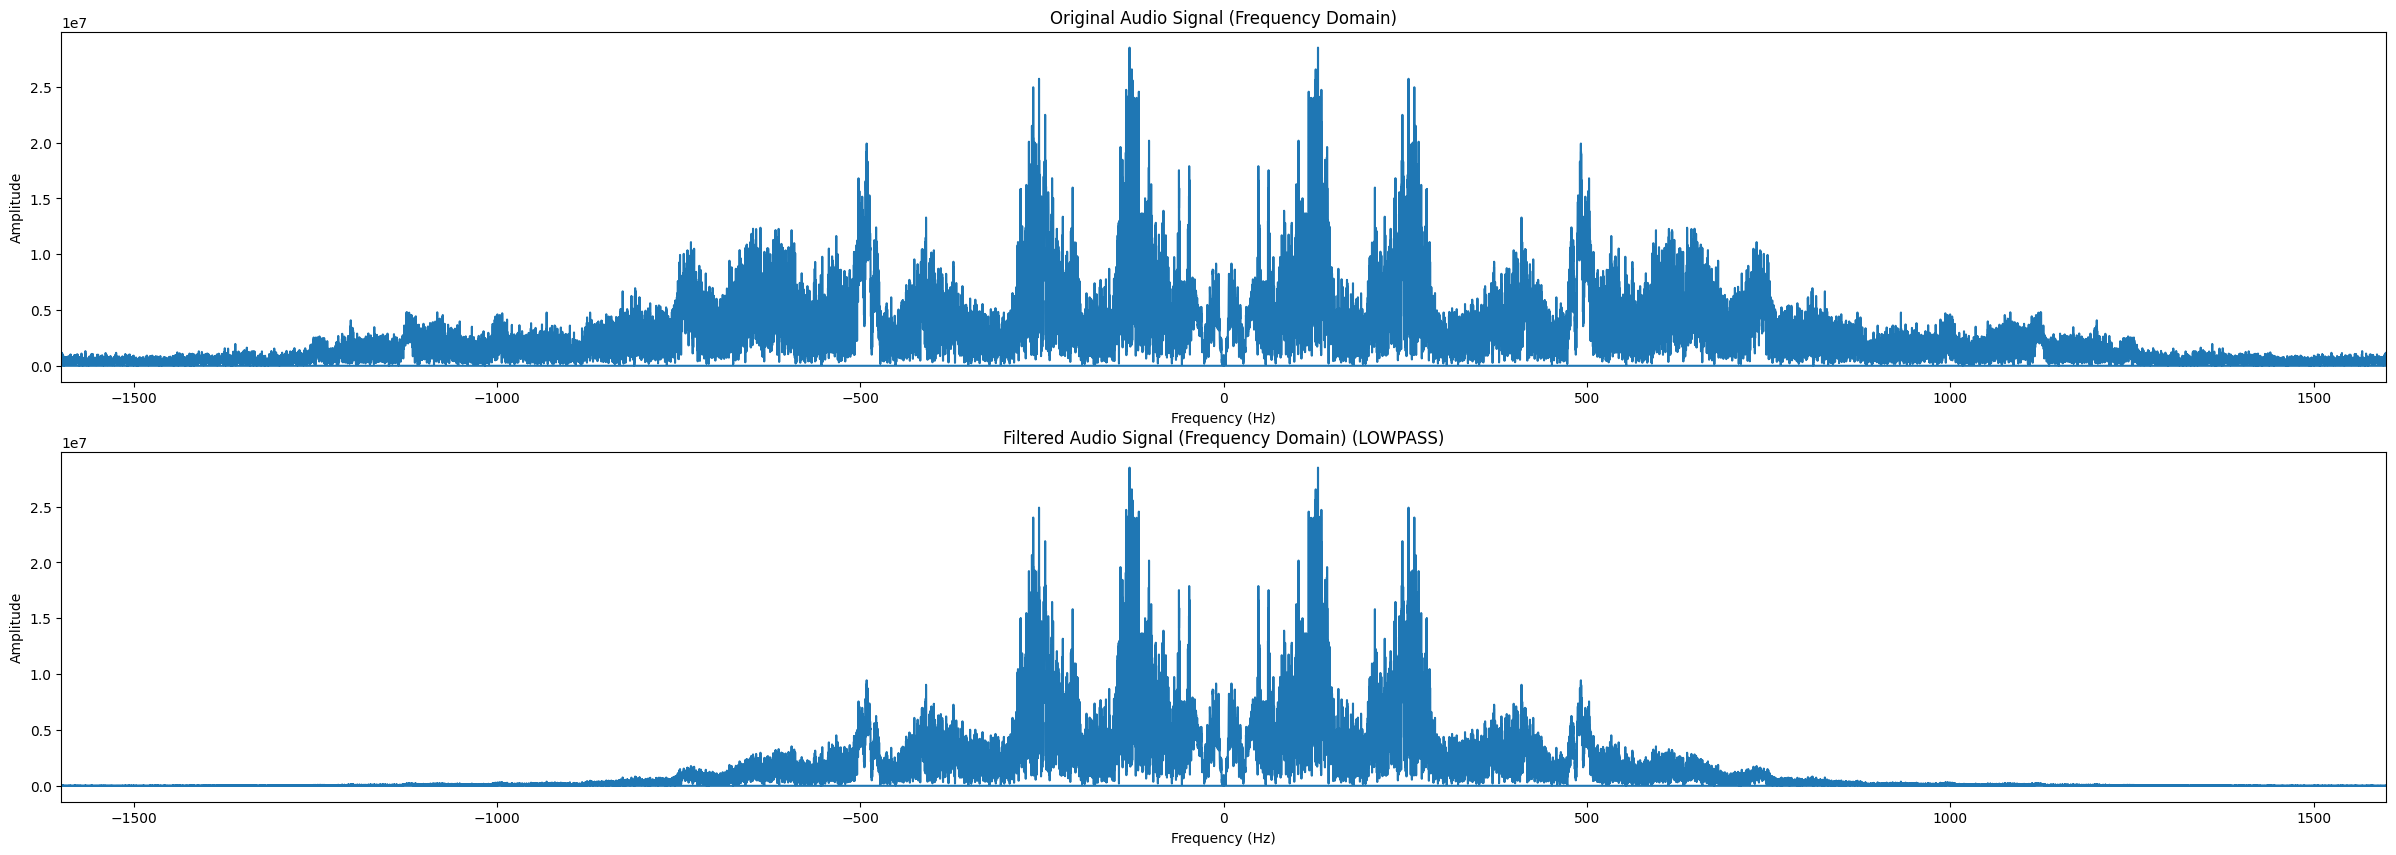

In [8]:
# Design and apply filter (can be either HPF or LPF)
b, a = butter(N=order,Wn= cutoff, btype=filter_type, analog=False, fs = fs) # 5th order filter , b == numerator, a == denominator
filtered_signal_time = lfilter(b, a, data) # apply filter to fft data (time domain)
filtered_signal = fft.fft(filtered_signal_time) # get fft of filtered data (frequency domain)

# Compute the frequencies
frequencies = np.fft.fftfreq(len(filtered_signal), 1/fs)

# show the original and filtered signals in the frequency domain:
plt.figure(figsize=(30, 10))
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(transformed_signal))
plt.xlim(-cutoff*4,cutoff*4)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Original Audio Signal (Frequency Domain)")
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(filtered_signal))
plt.xlim(-cutoff*4,cutoff*4)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title(f"Filtered Audio Signal (Frequency Domain) ({filter_type.upper()})")
plt.show()

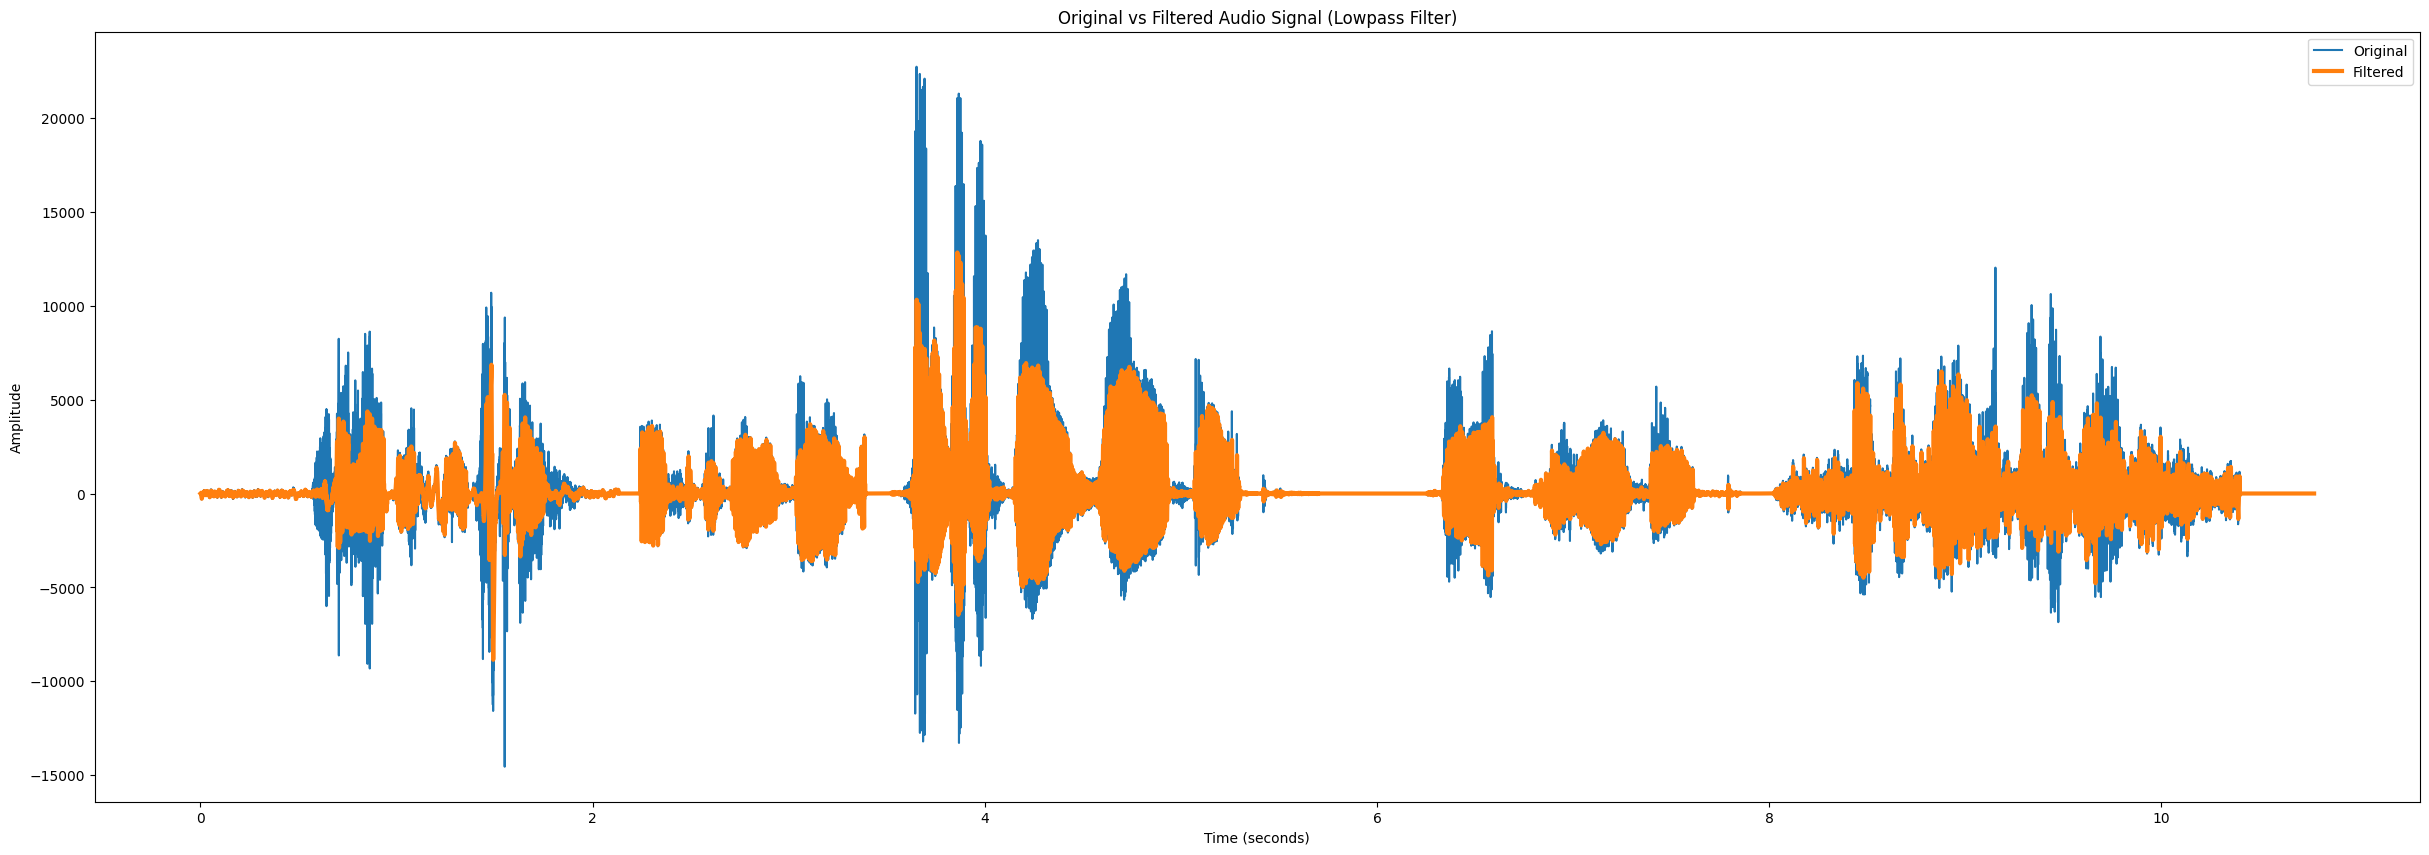

In [5]:
# Convert filtered FFT back to time domain and save
filtered_data = filtered_signal_time # filtered data in time domain

# Create a time array (in seconds)
t = np.linspace(0, len(filtered_data) / fs, num=len(filtered_data))

# show the original and filtered signals in time domain:
plt.figure(figsize=(30, 10))
plt.plot(t, data, label='Original')
plt.plot(t, filtered_data, linewidth=3, label='Filtered')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Original vs Filtered Audio Signal ({filter_type.capitalize()} Filter)")
plt.legend()
plt.show()

In [6]:
# Normalize and save audio
wavfile.write('filtered_audio.wav', fs, filtered_data.astype(np.int16)) # normalize and save audio
# can also normalize using: filtered_data = filtered_data / np.max(np.abs(filtered_data))

print("Filtered audio saved as 'filtered_audio.wav'!")

Filtered audio saved as 'filtered_audio.wav'!
